# Exploration 13

## 프로젝트 : CIFAR-10 이미지 생성하기
### |프로젝트 학습 과정

1. 데이터셋 구성하기
2. 생성자 모델 구현하기
3. 판별자 모델 구현하기
4. 손실함수와 최적화 함수 구현하기
5. 훈련과정 상세 기능 구현하기
6. 학습 과정 진행하기
7. (optional) GAN 훈련 과정 개선하기

### |프로젝트 평가
| |평가문항|상세기준|
|------|---|---|
|1|GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.|오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다.|
|2| 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.|gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.|
|3| 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.| 제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 아이디어 적용 이전보다 향상되었음을 시각적으로 입증하였다.|

# Data Info

[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

1. 60,000장의 32x32 colour images
2. 10 classes with 6,000 images per class
3. 50,000 training images, 10,000 test images

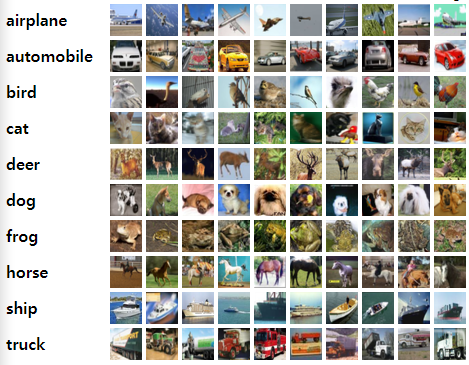


# 1. 데이터셋 구성하기

- 학습에 사용할 train_x의 이미지를 -1, 1로 정규화합니다.
- 로드한 학습 데이터를 시각화를 통해 확인해 봅시다.
- tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋을 구성해 봅시다.

In [42]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils

print("tensorflow", tf.__version__)

tensorflow 2.4.1


In [43]:
cifar10 = tf.keras.datasets.cifar10
(train_x, _), (test_x, _) = cifar10.load_data()

In [44]:
type(train_x)

numpy.ndarray

In [45]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


## train_x 이미지 정규화

이미지이기 때문에 픽셀 값이 0~255의 정숫값을 가진다. 그래서 원래라면 255를 나눠 픽셀값이 [0, 1]이 되도록 이미지 정규화를 해주는데, 여기서는 이미지를 [-1, 1]로 정규화해줍니다.

In [46]:
mid_pixel = train_x.max()/2
print(mid_pixel)

127.5


In [47]:
train_x = (train_x - mid_pixel) / mid_pixel

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [48]:
print(train_x.shape)

(50000, 32, 32, 3)


train set에는 5만장의 이미지가 들어있고, 32x32 크기의 RGB 이미지네요. 여기서 이미 train_x 데이터에는 channel이 추가되어 있다는 점을 알 수 있습니다. 이미지를 다루려면 채널 수에 대한 차원이 필요합니다.

In [49]:
# numpy의 ndarray 배열로 변환 - astype
train_x = train_x.reshape(train_x.shape[0], 32, 32, 3).astype('float32')
print(train_x.shape)

(50000, 32, 32, 3)


In [50]:
type(train_x)

numpy.ndarray

## 학습 데이터 시각화

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

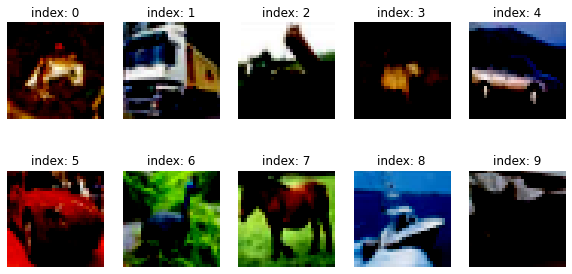

In [65]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i])
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

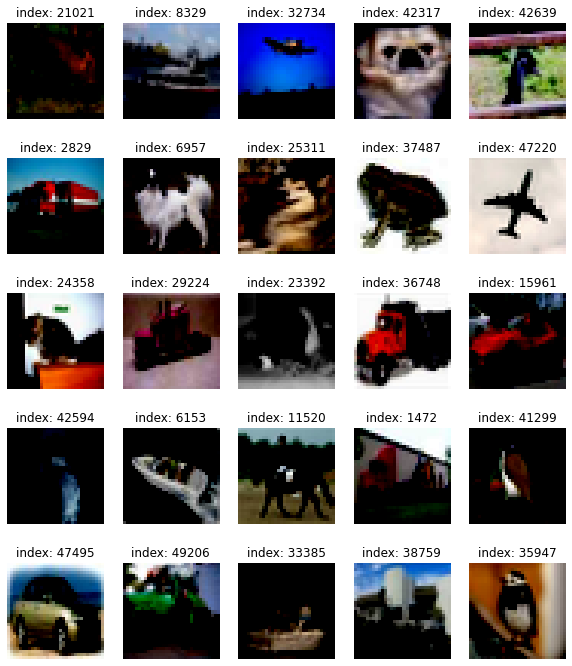

In [66]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index])
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

## 미니배치 데이터셋 구성
BUFFER_SIZE는 데이터가 잘 섞이게 하기 위해 전체 train_x 데이터 크기인 5만으로 설정하였습니다. BATCH_SIZE는 한 번에 학습할 데이터의 양입니다.

In [55]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [56]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 2. 생성자 모델 구현하기

## DCGAN(Deep Convolutional GAN)

In [67]:
def make_generator_model():
    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [68]:
generator = make_generator_model()
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_6 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 8, 8, 128)        

make_generator_model() 함수를 만들어서 언제든 생성자를 생성할 수 있도록 했습니다. 함수 내부에서는 먼저 tf.keras.Sequential()로 모델을 시작한 후 레이어를 차곡차곡 쌓아줍니다.

여기서 중요한 레이어는 바로 Conv2DTranspose 레이어입니다. Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지를 넓혀주는 층입니다. 이 모델에서는 세 번의 Conv2DTranspose 층을 이용해

(8, 8, 256) → (16, 16, 64) → (32, 32, 3)

순으로 이미지를 키워나갑니다. 최종 사이즈는 (32, 32, 3)은 현재 활용하려고 하는 이미지와 동일합니다.

### Transposed Convolutional Layer란?
레이어 사이에 특정 층이 반복됩니다. BatchNormalization 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화 시켜주는 역할을 합니다.

또한, 중간층들의 활성화 함수는 모두 LeakyReLU를 사용합니다. 다만 마지막 층에는 활성화 함수로 tanh를 사용했습니다. 이유는 아까 이미지를 [-1, 1] 이내의 값으로 픽셀을 정규화 시켰기 때문입니다. 데이터셋과 동일하게 해주기 위해서입니다!

# 3. 판별자 모델 구현

In [71]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [72]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

판별자는 make_discrimanator_model() 함수로 구현하였습니다.

Conv2DTranspose 층을 사용하여 이미지를 키워나갔던 생성자와 반대로 판별자는 Conv2D층으로 이미지의 크기를 점점 줄여나갑니다. 첫번째로 Conv2D 층에서 입력된 [32, 32, 3] 사이즈의 이미지는 다음 층을 거치며 (32,32,3) → (16,16,64) → (8,8,128)까지 줄어들게 됩니다.

마지막에는 Flatten 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 8x8x128=8192, 즉 (1, 8192) 형상의 벡터로 변환합니다. 이는 생성자의 Reshape 층에서 1차원 벡터를 3차원으로 변환했던 것과 반대 역할을 합니다. 1차원 벡터로 변환한 후에는 마지막 Dense Layer를 거쳐 단 하나의 값을 출력합니다.

# 4. 손실함수와 최적화함수


## 손실함수 (loss function)

GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용합니다. 교차 엔트로피는 분류 모델을 설계할 때 많이 사용했던 손실함수입니다.

생성자와 판별자는 경쟁 구도를 갖고 있다고 했습니다. 생성자는 자신이 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이려고 노력할 것이고, 판별자는 생성자가 생성한 Fake Image를 가짜라고, 진짜 이미지를 진짜로 잘 판별하는 것이 목표입니다.

> Real Image Label : 1, Fake Image : 0

으로 두고 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표를 만들어줍니다.

In [73]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)
- real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)

In [74]:
# generator_loss는 1에 가까워지기를 바라므로 tf.ones_like와 교차 엔트로피 계산
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [75]:
# discriminator_loss는 real_output은 1, fake_output은 0에 가까워지기를 바람
# 그러므로 두 가지 loss를 모두 계산
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # real_output은 1로 채워진 벡터
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # fake_output은 0으로 채워진 벡터
    total_loss = real_loss + fake_loss
    return total_loss

In [76]:
# discriminator accuracy - 판별자가 얼마나 정확히 판별하는지
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

Q. 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별한다고 좋은 것일까요?
> 그렇지 않습니다! 이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻입니다.

> 그래서 real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적입니다. fake accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻입니다.

## 최적화 함수(optimizer)

- Adam 최적화 기법 활용
- 중요한 하이퍼파라미터인 "learning rate" 0.0001로 설정
- 하이퍼파라미터는 여러 가지 값으로 바꾸어 학습 진행하는 것도 가능

In [77]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## 학습 진행 상황 확인하기 위한 샘플

In [78]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

# 5. 생성 모델 훈련 과정 설계

In [80]:
@tf.function
def train_step(images):  #(1) 입력데이터
    #(2) 생성자 입력 노이즈
    noise = tf.random.normal([BATCH_SIZE, noise_dim]) 

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # (3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)
        # (4) generated_images 생성

        # (5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # (6)loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        # (7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    # (8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # (9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    #(10) 리턴값
    return gen_loss, disc_loss, real_accuracy, fake_accuracy  

## 학습 현황 확인하는 sample

In [85]:
#샘플 생성하는 함수
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)
    
    sample_save_path = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/generated_samples3/'
    
    try : 
        if not os.path.exists(sample_save_path) :
            #지정한 경로가 없으면 생성하는 코드
            os.makedirs(sample_save_path)
    except OSError :   
        print('Erroe : Creating directory. ', + sample_save_path)
        
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        inv_predictions = predictions.numpy()   
        #역정규화를 하기 위해 numpy로 변경
        inv_predictions = (inv_predictions * 127.5) + 127.5    
        #원본 이미지와 동일하게 출력하기 위해 역정규화를 해줌.
        inv_predictions = inv_predictions.astype(int)
        
        plt.subplot(4, 4, i+1)
        #plt.imshow((predictions[i, :, :, :]))
        #plt.imshow(predictions[i])
        plt.imshow(inv_predictions[i])
        plt.axis('off')
    plt.savefig(sample_save_path + 'sample_epoch_{:04d}_iter_{:03d}.png'.format(epoch, it))


    plt.show()

## 매 epoch마다 시각화 하는 함수

In [86]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6  

def draw_train_history(history, epoch):
    #summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    #summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  

    history_save_path = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_history3/'

    try : 
        if not os.path.exists(history_save_path) :      
            #지정한 경로가 없으면 생성하는 코드
            os.makedirs(history_save_path)
    except OSError :
        print('Erroe : Creating directory. ', + history_save_path)
    
    #training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장.
    plt.savefig(history_save_path + 'train_history_{:04d}.png'.format(epoch))
    plt.show()

## checkpoint

In [88]:
#정기적으로 모델을 저장하기 위한 checkpoint.
#checkpoint에는 optimizer와 생성자, 구분자를 모두 넣어 저장.
#생성자와 구분자가 학습한 모델 가중치를 저장.

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# 6. 학습 과정 진행

## 지금까지 달려온 길
1. train_step 한 단계씩 학습
2. generate_and_save_images() 샘플 이미지 생성 및 저장
3. draw_train_history() 학습 과정 시각화
4. checkpoint 모델 저장

이 단계를 한 곳에 합쳐보겠습니다.

In [89]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [90]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 시도1. 기본 노드와 동일하게 - EPOCHS 50 

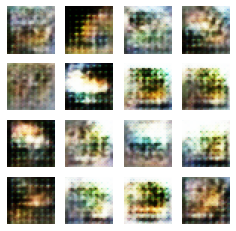

Time for training : 1435 sec


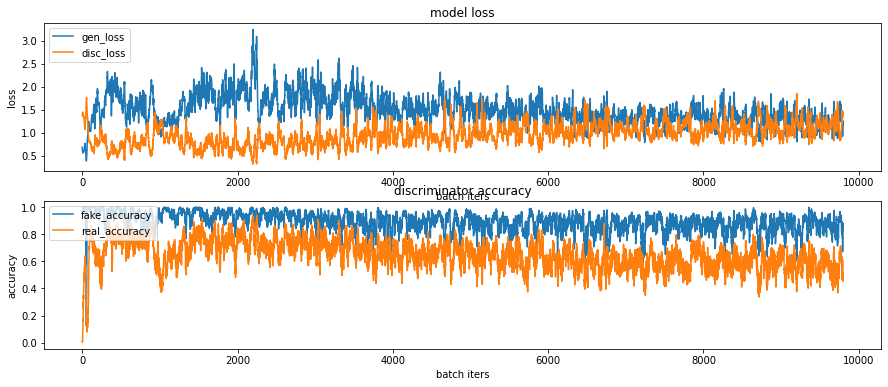

CPU times: user 23min 47s, sys: 18.6 s, total: 24min 6s
Wall time: 23min 56s


In [91]:
%%time
train(train_dataset, EPOCHS, save_every)

## 학습 과정 시각화하기

In [104]:
#샘플 이미지들을 합쳐 GIF 파일, 일명 움짤로 만듦.
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples3/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif

-rw-r--r-- 1 root root 1446313 Sep  2 02:39 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif


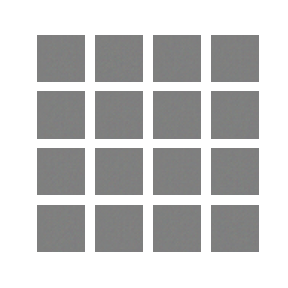

In [106]:
from IPython.display import Image
Image(open('cifar10_dcgan3.gif','rb').read())

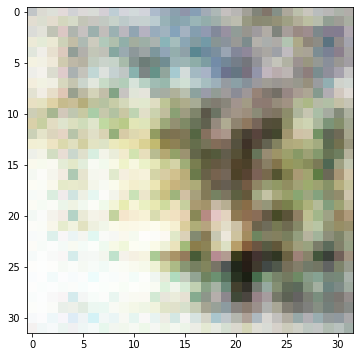

In [108]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

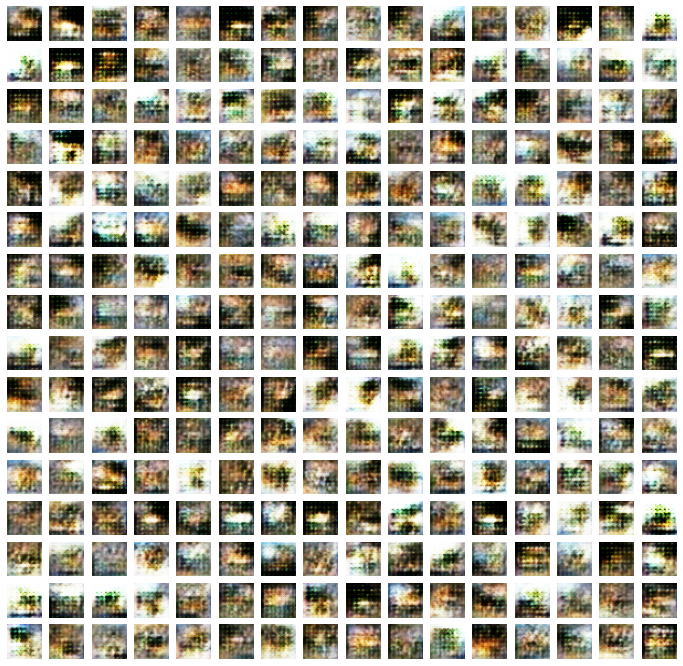

In [110]:
plt.figure(figsize=(12, 12))

for i in range(256):
    plt.subplot(16, 16, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()

## 시도1. 정리
- 이미지 형태를 알아보기 어렵고 노이즈가 심한 것을 알 수 있다.
- loss가 점점 더 올라가고 있다.
- accuracy도 서로 양상이 다르다.
- real accuracy는 0.5 가까이 내려오고, fake accuracy는 아직 1에 가깝다.
- 이것의 의미는 결과가 아주 잘못 되었다는 것을 의미
- 이상적으로 real accuracy는 1에 가깝고 fake accuracy는 0에 가까워야 하기 때문이다.

하지만 일단 우리는 둘 다 0.5로 가기를 바라고 있다.

## 시도2. EPOCHS = 150 수정

In [111]:
save_every = 5
EPOCHS = 150

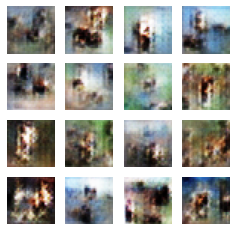

Time for training : 4319 sec


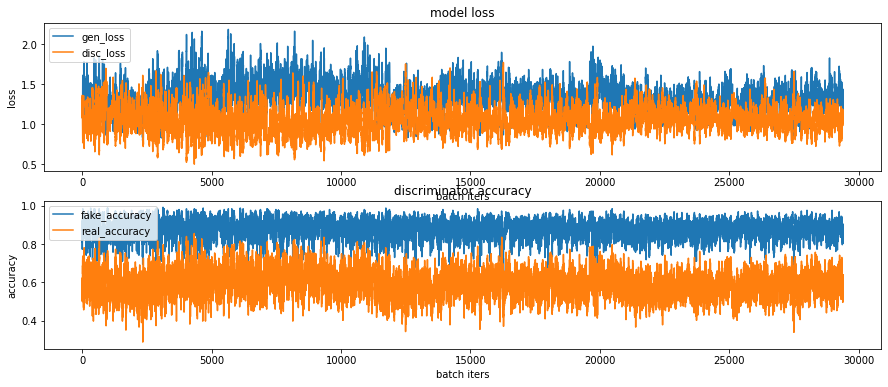

CPU times: user 1h 11min 52s, sys: 47.6 s, total: 1h 12min 40s
Wall time: 1h 12min


In [112]:
%%time
train(train_dataset, EPOCHS, save_every)

## 시도2. 정리
- 이전보다 이미지 형태가 더 뚜렷해졌다.
- Epoch를 늘리는 것이 도움이 된다는 것을 알 수 있다.
- loss가 떨어지지 않고 있다.
- accuracy도 마찬가지로 서로 양상이 다르다.
- real accuracy와 fake accuracy는 아직 유의미하다고 보긴 어렵다.
- fake accuracy는 전혀 떨어지지 않고 있다.

## 시도3. Epoch를 300까지 늘리기

In [113]:
save_every = 5
EPOCHS = 300

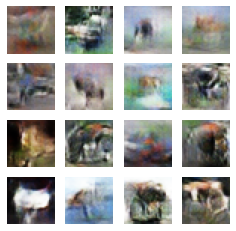

Time for training : 8768 sec


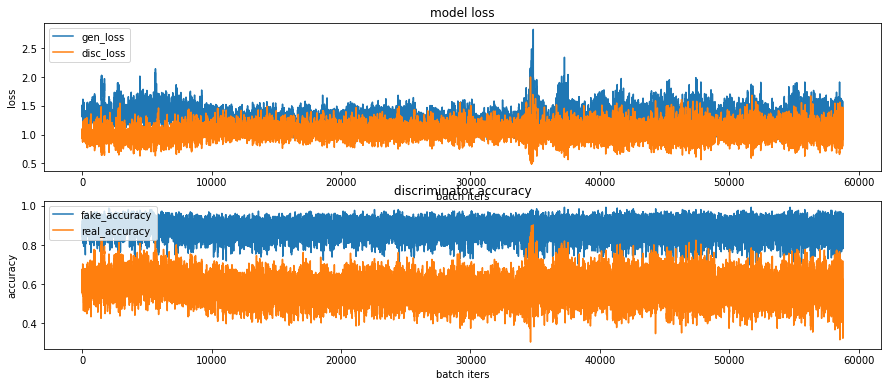

CPU times: user 2h 25min 55s, sys: 1min 35s, total: 2h 27min 30s
Wall time: 2h 26min 10s


In [114]:
%%time
train(train_dataset, EPOCHS, save_every)

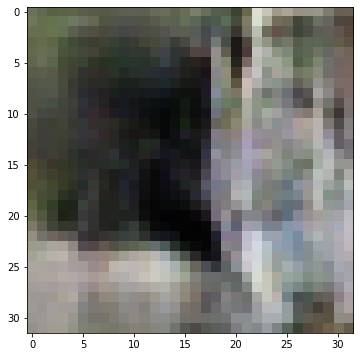

In [115]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

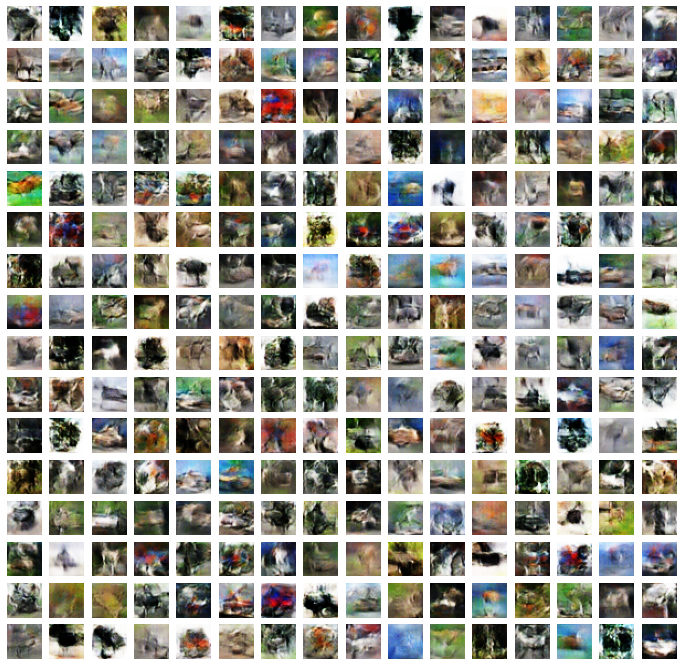

In [116]:
plt.figure(figsize=(12, 12))

for i in range(256):
    plt.subplot(16, 16, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()

## 시도3. 정리
- 이미지 화질이 올라갔다.
- Epoch를 더 늘리면 더 좋아질 가능성이 있다.
- loss가 떨어지지 않고 있다.
- accuracy도 마찬가지로 서로 양상이 다르다.
- real accuracy와 fake accuracy는 전혀 좋아지려는 기미가 보이지 않는다.

## 시도4. 하이퍼파라미터를 조정한 새로운 모델

In [120]:
def make_generator_model():
    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

generator = make_generator_model()
generator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_12 (Batc (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16384)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_13 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 8, 8, 128)        

In [121]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.4))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.4))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [122]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4)

In [123]:
save_every = 20
EPOCHS = 150

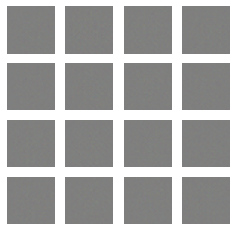

Time for training : 4337 sec


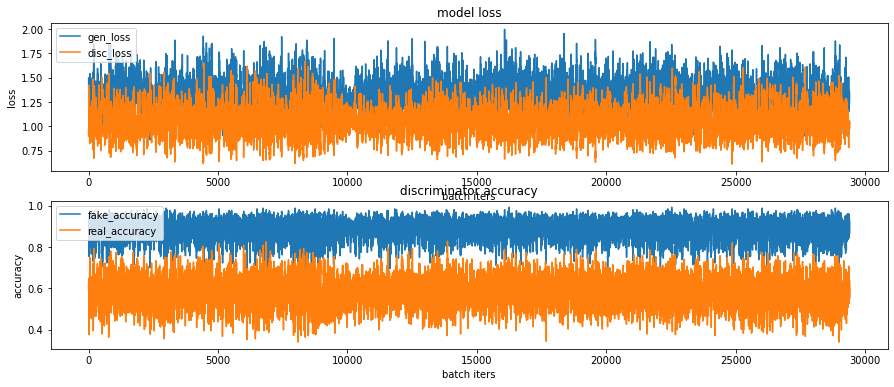

CPU times: user 1h 12min 9s, sys: 48.4 s, total: 1h 12min 58s
Wall time: 1h 12min 18s


In [124]:
%%time
train(train_dataset, EPOCHS, save_every)

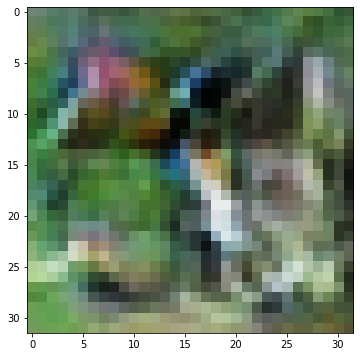

In [125]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

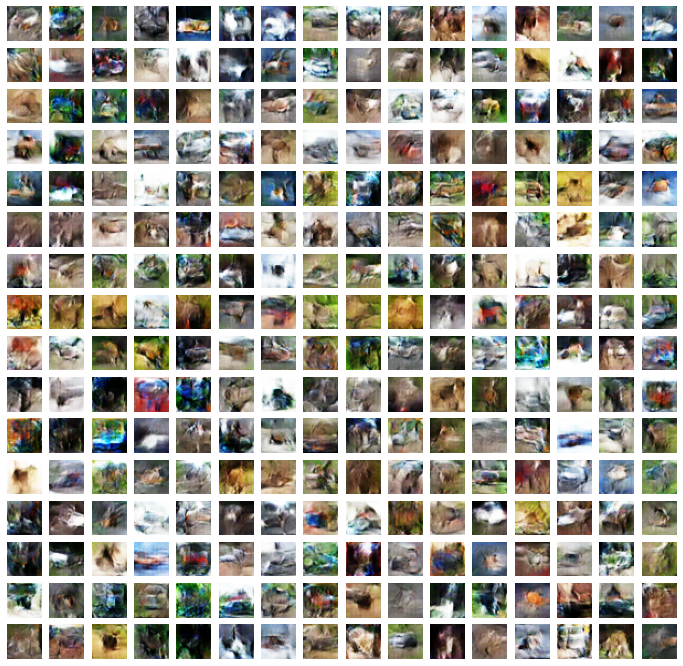

In [126]:
plt.figure(figsize=(12, 12))

for i in range(256):
    plt.subplot(16, 16, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()

## 시도4. 정리
- 이미지 화질은 선명해졌지만, 성능이 그렇게 좋다고 보기엔 어려운 결과가 나왔다.
- loss가 기존 epoch만 늘렸을 때보다 높다.
- accuracy도 마찬가지로 서로 양상이 다르다.
- real accuracy와 fake accuracy는 전혀 좋아지려는 기미가 보이지 않는다.

# 7. GAN 훈련 과정 개선하기

1. EPOCHS 조절
    - EPOCHS = 50     # 시도1
    - EPOCHS = 150    # 시도2
    - EPOCHS = 300    # 시도3

   
2. 하이퍼파라미터 변경  # 시도4
    - Learning Rate: 0.0001 → 0.0002
    - Momentum: 0.5 추가

# 8. 프로젝트 정리

1. GAN의 구조와 원리를 이해하며 흐름을 따라갈 수 있었다.
2. 텐서플로우로 짠 DCGAN 학습 코드를 익히며 응용할 수 있었다.
3. 하이퍼파라미터에 대한 이해

# 참고 및 보충

CIFAR10을 활용한 GAN 개발 방법 가이드 [클릭](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

# 링크와 노드와 차이점

- 하이퍼파라미터 값(learning rate, 학습률): 노드는 0.0001, 링크는 0.0002
- Adam에게 momentum 값을 줌: 0.5
- 기울기가 0.2인 LeakyRelu 사용, 노드는 기울기 없음

# 시도해 볼만한 점
- 임의 노이즈를 추가하여 이미지 품질과 훈련 속도를 조절한다.
- 더 깊고 얕은 판별자 및 생성자 모델을 위해 생성자 모델에서 Upsampling2D 레이어 추가해보기